In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeRegressor
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from matplotlib.pyplot import show
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy import cluster
from scipy.spatial.distance import pdist
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

df = pd.read_csv("C:\\Users\\kousa\\Desktop\\VIDEO-GAME-SALES\\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
df.isna().sum().sort_values(ascending=False)

User_Count         9129
Critic_Count       8582
Critic_Score       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Genre                 2
Name                  2
Global_Sales          0
Other_Sales           0
JP_Sales              0
EU_Sales              0
NA_Sales              0
Platform              0
dtype: int64

Text(0.5, 0, 'Publisher Names')

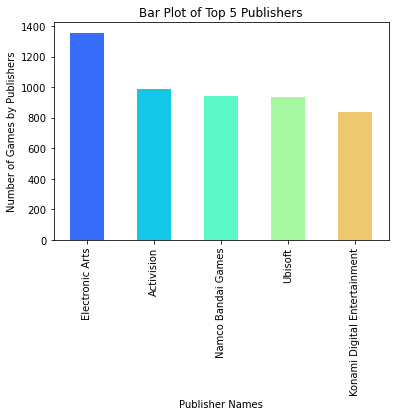

In [11]:
df.Publisher.value_counts().head(5).plot.bar(color=sns.color_palette("rainbow"))
plt.title('Bar Plot of Top 5 Publishers')
plt.ylabel('Number of Games by Publishers')
plt.xlabel('Publisher Names')

Text(0.5, 1.0, 'North American Sales vs Global Sales by Genre')

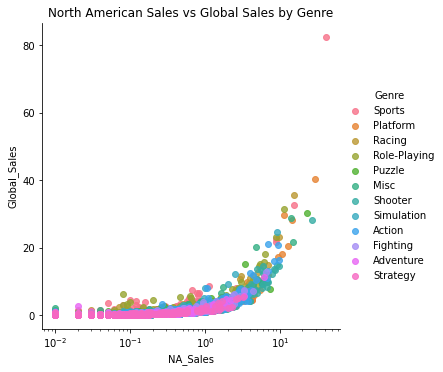

In [10]:
sns.lmplot(x='NA_Sales', y='Global_Sales', data=df,
           fit_reg=False, # No regression line
           hue='Genre')  # Color by evolution stage
plt.xscale('log')
plt.title('North American Sales vs Global Sales by Genre')

Text(0.5, 1, 'European Sales vs Global Sales by Platform')

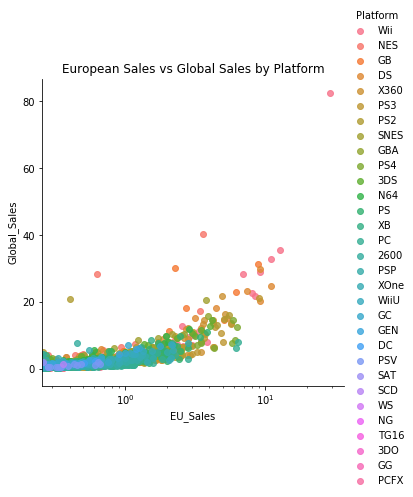

In [10]:
sns.lmplot(x='EU_Sales', y='Global_Sales', data=df,
           fit_reg=False, # No regression line
           hue='Platform')   # Color by evolution stage
plt.xscale('log')
plt.title('European Sales vs Global Sales by Platform')

Text(0, 0.5, 'Publisher Sales')

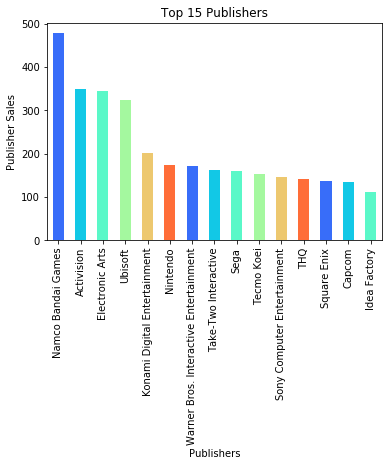

In [12]:
df = df.drop(df[df["Year_of_Release"] <= 2009].index)
df.drop(['Name','Developer','User_Count','Critic_Count','Critic_Score','Rating','User_Score','Global_Sales','Other_Sales'], axis = 1, inplace = True)
df.Publisher.value_counts().head(15).plot.bar(color=sns.color_palette("rainbow"))
plt.title('Top 15 Publishers')
plt.xlabel('Publishers')
plt.ylabel('Publisher Sales')

Text(0, 0.5, 'Platform Sales')

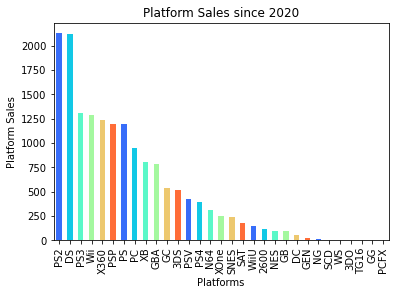

In [7]:
df.Platform.value_counts().plot.bar(color=sns.color_palette("rainbow"))
plt.title('Platform Sales since 2009')
plt.xlabel('Platforms')
plt.ylabel('Platform Sales')

Text(0, 0.5, 'Genre Sales')

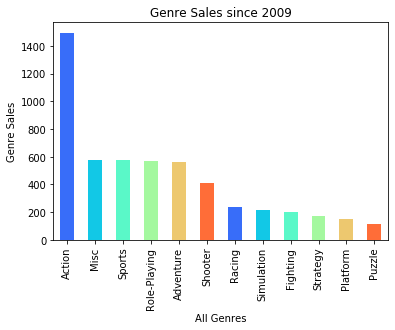

In [14]:
df.Genre.value_counts().plot.bar(color=sns.color_palette("rainbow"))
plt.title('Genre Sales since 2009')
plt.xlabel('All Genres')
plt.ylabel('Genre Sales')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)


remaining = list(range(X_train.shape[1]))
selected = []
n = 35
while len(selected) < n:
    rmse_min = 1e7
    for i in remaining:
        X_i = X_train.iloc[:,selected+[i]]
        scores = cross_val_score(LinearRegression(), X_i, y_train,
        scoring='neg_mean_squared_error', cv=5)
        rmse = np.sqrt(-scores.mean())
        if rmse < rmse_min:
            rmse_min = rmse
            i_min = i
    remaining.remove(i_min)
    selected.append(i_min)
    print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))
print(selected)
list(zip(X, selected))

num features: 1; rmse: 0.34
num features: 2; rmse: 0.33
num features: 3; rmse: 0.33
num features: 4; rmse: 0.33
num features: 5; rmse: 0.33
num features: 6; rmse: 0.32
num features: 7; rmse: 0.32
num features: 8; rmse: 0.32
num features: 9; rmse: 0.32
num features: 10; rmse: 0.32
num features: 11; rmse: 0.32
num features: 12; rmse: 0.32
num features: 13; rmse: 0.32
num features: 14; rmse: 0.32
num features: 15; rmse: 0.32
num features: 16; rmse: 0.32
num features: 17; rmse: 0.32
num features: 18; rmse: 0.32
num features: 19; rmse: 0.32
num features: 20; rmse: 0.32
num features: 21; rmse: 0.32
num features: 22; rmse: 0.32
num features: 23; rmse: 0.32
num features: 24; rmse: 0.32
num features: 25; rmse: 0.32
num features: 26; rmse: 0.32
num features: 27; rmse: 0.32
num features: 28; rmse: 0.32
num features: 29; rmse: 0.32
num features: 30; rmse: 0.32
num features: 31; rmse: 0.33
num features: 32; rmse: 0.33
num features: 33; rmse: 0.33
num features: 34; rmse: 0.33
num features: 35; rmse:

[('Genre_Action', 26),
 ('Genre_Adventure', 7),
 ('Genre_Fighting', 12),
 ('Genre_Misc', 21),
 ('Genre_Platform', 18),
 ('Genre_Puzzle', 14),
 ('Genre_Racing', 19),
 ('Genre_Role-Playing', 8),
 ('Genre_Shooter', 24),
 ('Genre_Simulation', 5),
 ('Genre_Sports', 1),
 ('Genre_Strategy', 13),
 ('Platform_3DS', 20),
 ('Platform_DS', 28),
 ('Platform_PC', 27),
 ('Platform_PS4', 30),
 ('Platform_PSV', 22),
 ('Platform_Wii', 23),
 ('Platform_WiiU', 10),
 ('Platform_XOne', 31),
 ('Publisher_Activision', 15),
 ('Publisher_Capcom', 16),
 ('Publisher_Electronic Arts', 34),
 ('Publisher_Idea Factory', 32),
 ('Publisher_Konami Digital Entertainment', 25),
 ('Publisher_Namco Bandai Games', 17),
 ('Publisher_Nintendo', 3),
 ('Publisher_Sega', 0),
 ('Publisher_Sony Computer Entertainment', 11),
 ('Publisher_Square Enix', 4),
 ('Publisher_THQ', 29),
 ('Publisher_Take-Two Interactive', 2),
 ('Publisher_Tecmo Koei', 33),
 ('Publisher_Ubisoft', 6),
 ('Publisher_Warner Bros. Interactive Entertainment', 9)]